## Random split

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use(u'seaborn-paper')
plt.style.use('seaborn-white')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
plt.tick_params(labelsize=22)
    
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['darkblue', 'darkgreen'])

import seaborn as sns
import numpy as np
from numpy import NaN

import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import urllib.request
import re
from re import sub

import math
import requests 
import json
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew  

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from bs4 import BeautifulSoup
from requests import get
from pandas import DataFrame
from tabulate import tabulate
import dtale

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

import itertools
from itertools import chain
from IPython.core.display import HTML

import matplotlib.pyplot as plt
from decimal import Decimal
import datetime

import shapely
from shapely.geometry import Point, MultiPoint, Polygon
from shapely.ops import nearest_points
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import shapefile as shp


from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
%matplotlib inline

/Users/joje/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def CV_function(X_train,y_train,X_test,y_test,model,model_params):
    clf = GridSearchCV(model, model_params, cv= 10, refit=True, scoring ='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    clf_best = clf.best_estimator_
    y_pred_train = clf_best.predict(X_train)
    y_pred = clf_best.predict(X_test)
    score = [mean_squared_error(y_test, y_pred), mean_squared_error(y_train, y_pred_train) , r2_score(y_test, y_pred), r2_score(y_train, y_pred_train),]
    
    
    print('MSE, train: %0.5f'%(mean_squared_error(y_train, y_pred_train)))
    print('MAE, test: %0.5f'% np.mean(np.absolute(y_pred_train - y_train)))
    print('R^2, train: %0.5f'%(score[3]))
    

    print('MSE, test: %0.5f'%(score[0]))
    print('MAE, test: %0.5f'% (np.mean(np.absolute(y_pred - y_test))))
    print('R^2, test: %0.5f'%(score[2]))
    
    #print('Random guess: %f'%(score[0] / (np.var(y_test))))
    
    if (len(model_params.keys()) == 0) :
        return score, y_pred, clf, clf_best
    else:
    # PLOTTING:
        asa=clf.cv_results_
        # Make a fake dataset:
        height = np.sqrt(asa['mean_test_score']*(-1))
        bars = asa['params']
        y_pos = np.arange(len(bars))
        # Create bars
        plt.plot(y_pos, height)
        # Create names on the x-axis
        plt.xticks(y_pos, bars)
        plt.xticks(rotation=90)
        # Show graphic
        plt.show()
        
        return score, y_pred, clf, clf_best


In [3]:
def y_plot_blue(y_test, y_pred):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'royalblue')
    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c = 'royalblue')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    plt.show()
    
    
def y_plot_coral(y_test, y_pred):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'lightcoral')
    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c = 'lightcoral')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    plt.show()

In [4]:
size=16
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': 25}
plt.rcParams.update(params)

def y_2plot(y_test, y_train, y_pred, model_best):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_train), model_best.predict(X_train), alpha=0.1, c = 'lightcoral')
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'royalblue')

    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')

    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_train), np.exp(model_best.predict(X_train)), alpha=0.1, c = 'lightcoral')
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c='royalblue')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')

    plt.show()

In [5]:
def ResidualPlots(y_test, y_pred):
    residuals = y_pred - y_test
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_pred, y_test, lowess=True, scatter_kws={'alpha': 0.1}, color = 'royalblue',
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'royalblue', 
                            scatter_kws={'alpha': 0.1}, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()

def ResidualPlotsCoral(y_test, y_pred):
    residuals = y_pred - y_test
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_pred, y_test, lowess=True, scatter_kws={'alpha': 0.1}, color = 'lightcoral',
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'lightcoral', 
                            scatter_kws={'alpha': 0.1}, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()    

    
    
# Quick
def ResidualPlotsQuick(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":np.exp(y_pred), "true":np.exp(y_test)})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")


In [6]:
def Residual2Plots(y_test, y_train, y_pred, model_best):
    residuals = y_pred - y_test
    residualss = y_train - model_best.predict(X_train)
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
    model_norm_residualss_abs_sqrt=np.sqrt(np.abs(residualss))
    
    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_train, model_best.predict(X_train), lowess=True, color = 'lightcoral', 
                              scatter_kws={'alpha': 0.1}, 
                              line_kws={'color': 'crimson', 'lw': 1, 'alpha': 0.8})
    ResponseY = sns.residplot(y_pred, y_test, color = 'royalblue', 
                              scatter_kws={'alpha': 0.1}, lowess=True,
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8})    
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_train), model_norm_residualss_abs_sqrt, color = 'lightcoral', 
                            scatter_kws={'alpha': 0.1}, lowess=True, 
                            line_kws={'color': 'crimson', 'lw': 1, 'alpha': 0.8})
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'royalblue', 
                            scatter_kws={'alpha': 0.1}, lowess=True, 
                            line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()


### Load data

In [7]:
# No city 
df = pd.read_csv('Endeligt data/df_modell.csv')

# Split into y and X 
y_save = df.loc[:, df.columns.isin(['GeomaticAVMPrice', 'AskingPrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'LandValue', 'TaxableValue', 'Type'])]
y = df.loc[:, df.columns.isin(['SalePrice'])]
X_save = df.loc[:, df.columns.isin(['LinkGeo', 'LinkBoligsiden', 'Address'])]
X = df.loc[:, ~df.columns.isin(['SaleDateNum','RadonRisk','LinkGeo', 'LinkBoligsiden', 'Address', 'Lokation', 'Quarter', 'Year','YearQuarter','SalePrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'Latitude', 'Longitude', 'LandValue', 'TaxableValue'])]
df = pd.concat([y, X], axis=1)


# Do something with Neighbors
print(df.Neighbors.isnull().sum())
df['Neighbors'] = df['Neighbors'].fillna(0)
print(df.Neighbors.isnull().sum())

# Any zeros?
#print(df.isnull().values.any())
#df.dropna(inplace=True)


# Splittig into train and test data
df['SaleDate'] = pd.to_datetime(y_save['SaleDate'],format='%Y-%m-%d', errors='coerce')
#valdate = datetime.datetime(2019, 4, 3)
valdate = datetime.datetime(2019, 1, 1)

#log transform other targets:
#df['SalePrice'] = np.log(df['SalePrice'])
df['AskingPrice'] = np.log(y_save['AskingPrice'])
df['GeomaticAVMPrice'] = np.log(y_save['GeomaticAVMPrice'])
df['OffVurdering'] = np.log(y_save['LandValue'] + y_save['TaxableValue'])
df['Type'] = y_save['Type']
#df = df[df['SalePrice'].between(df['SalePrice'].quantile(.05), df['SalePrice'].quantile(.95))] # without outliers

Test = df[df.SaleDate > valdate]

y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
y_test_type = Test['Type']
X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

Train = df[df.SaleDate <= valdate]
y_train = Train['SalePrice']
y_train_askprice = Train['AskingPrice']
X_train = Train.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

print( str(Train.shape[0]+ Test.shape[0]) + ' er lig ' + str(len(df)))

print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

677
0
35702 er lig 35702
(4504,) (4504, 159)
(31198,) (31198, 159)


### OLS

In [8]:
#########################################################
################ Prediction of SalePrice ################
#########################################################

model = linear_model.LinearRegression()
model_params = {}

score_OLS, y_OLS, model_OLS, model_best_OLS = CV_function(X_train,y_train,X_test,y_test,model,model_params)


MSE, train: 0.05219
MAE, test: 0.15348
R^2, train: 0.82132
MSE, test: 0.07243
MAE, test: 0.17461
R^2, test: 0.73781


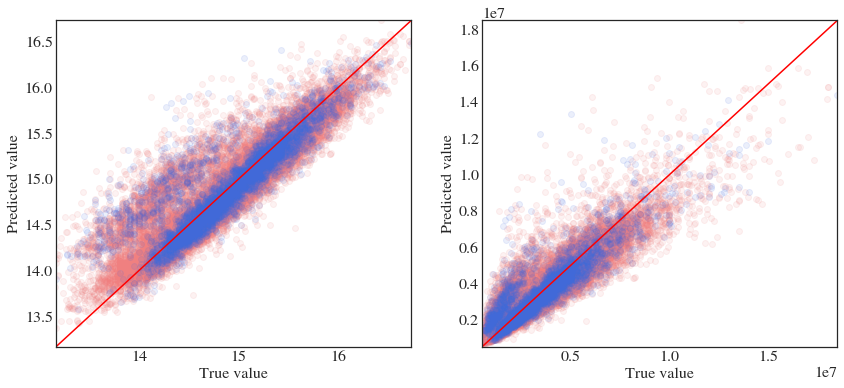

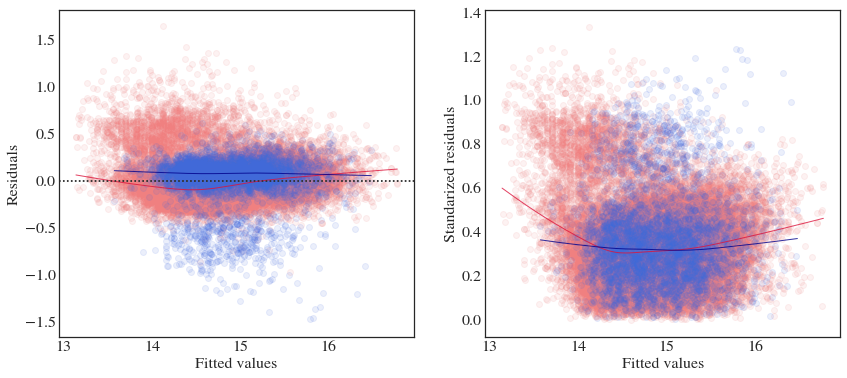

In [9]:
y_2plot(y_test, y_train, y_OLS, model_best_OLS)
Residual2Plots(y_test, y_train, y_OLS, model_best_OLS)

### OLS random

In [10]:
# No city 
df = pd.read_csv('Endeligt data/df_modell.csv')

# Split into y and X 
y_save = df.loc[:, df.columns.isin(['GeomaticAVMPrice', 'AskingPrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'LandValue', 'TaxableValue', 'Type'])]
y = df.loc[:, df.columns.isin(['SalePrice'])]
X_save = df.loc[:, df.columns.isin(['LinkGeo', 'LinkBoligsiden', 'Address'])]
X = df.loc[:, ~df.columns.isin(['SaleDateNum','RadonRisk','LinkGeo', 'LinkBoligsiden', 'Address', 'Lokation', 'Quarter', 'Year','YearQuarter','SalePrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'Latitude', 'Longitude', 'LandValue', 'TaxableValue'])]
df = pd.concat([y, X], axis=1)

# Do something with Neighbors
print(X.Neighbors.isnull().sum())
X['Neighbors'] = X['Neighbors'].fillna(0)
print(X.Neighbors.isnull().sum())

X = X.drop(columns=['AskingPrice', 'GeomaticAVMPrice', 'Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1262, random_state=42)
y_test = y_test['SalePrice']
y_train = y_train['SalePrice']


print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

dtale.show(X_train, ignore_duplicate=True)



677
0
(4506,) (4506, 159)
(31196,) (31196, 159)


In [11]:
model_random = linear_model.LinearRegression()
model_params = {}

score_OLS_random, y_OLS_random, model_OLS_random, model_best_OLS_random = CV_function(X_train,y_train,X_test,y_test,model_random,model_params)


/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



MSE, train: 0.05510
MAE, test: 0.15777
R^2, train: 0.81032
MSE, test: 0.05212
MAE, test: 0.15397
R^2, test: 0.81939


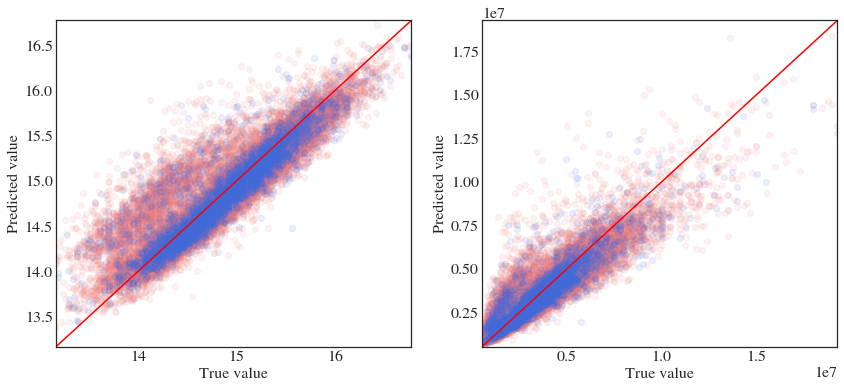

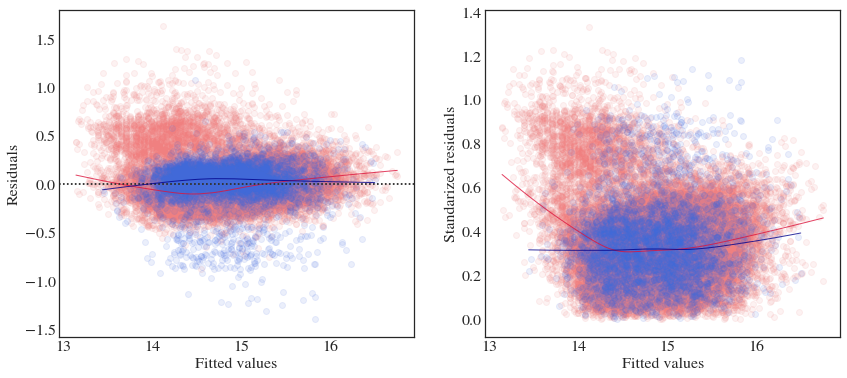

In [12]:
y_2plot(y_test, y_train, y_OLS_random, model_best_OLS_random)
Residual2Plots(y_test, y_train, y_OLS_random, model_best_OLS_random)

In [13]:
#################################
############## NEW ##############
#################################

data_random = {'OLS with split according to date':          [score_OLS[0],            score_OLS[1],           score_OLS[2],           score_OLS[3]],
               'OLS with random split':   [score_OLS_random[0],     score_OLS_random[1],    score_OLS_random[2],    score_OLS_random[3]]
              }


overview_random = pd.DataFrame.from_dict(data_random, 
                                  orient='index', 
                                  columns=['MSE (test)', 'MSE (train)', '$R^2$ (test)', '$R^2$ (train)'])

overview_random




,MSE (test),MSE (train),$R^2$ (test),$R^2$ (train)
OLS with split according to date,0.072434,0.052190,0.737807,0.821321
OLS with random split,0.052117,0.055098,0.819388,0.810320


In [14]:
print(overview_random.to_latex(float_format=lambda x: '%.5f' % x, index=True))  


\begin{tabular}{lrrrr}
\toprule
{} &  MSE (test) &  MSE (train) &  \$R\textasciicircum 2\$ (test) &  \$R\textasciicircum 2\$ (train) \\
\midrule
OLS with split according to date &     0.07243 &      0.05219 &       0.73781 &        0.82132 \\
OLS with random split            &     0.05212 &      0.05510 &       0.81939 &        0.81032 \\
\bottomrule
\end{tabular}

